<a href="https://colab.research.google.com/github/MukeshMishraReloaded/Supervised-Learning/blob/main/10_Notes_NB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Content
-  Hyperparameter tuning

-  Impact of imbalance

-  Underflow problem

-  Feature Importance and Interpretability

-  Multinomial Naive Bayes


## Loading data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!gdown 1zWrHUHliznqPg7Olyq41gmbbtHPWiEDn

Downloading...
From: https://drive.google.com/uc?id=1zWrHUHliznqPg7Olyq41gmbbtHPWiEDn
To: /content/processed_spam_data.pkl
100% 751k/751k [00:00<00:00, 45.5MB/s]


In [ ]:
df = pd.read_pickle('processed_spam_data.pkl')

In [ ]:
df.head()

type                                            message  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4          nah nt think goes usf lives around though

In [ ]:
df["type"] = df["type"].map({'spam':1,'ham':0})

Performing the `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

df_X_train, df_X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['type'], test_size=0.25, random_state=42)
print([np.shape(df_X_train), np.shape(df_X_test)])

[(4179,), (1393,)]


# **Hyper parameter tuning**

## **Q. What if we took a very large value of constant α in training dataset?**

Let's take an example to understand this:

Consider that the training dataset has 100 samples which have $y_i = 1 $ (i.e. $n_1 = 100$)

And we are computing the likelihood for a $text_i$ which has a word $w_j$ such that the number of times that word $w_j$ has occured in the dataset is 10 when $y_i = 1$. (i.e. $n_{j1} = 10$)


Now, if we calculate the likelihood $P(w_j|y=1)$ without any laplace Smoothing,
- $P(w_j|y=1) = \frac{n_{j1}}{n_1} = \frac{10}{100} = 0.1$

<br>

Lets consider the case where we take a small value of α, such as α = 1,
- Then, $P(w_j|y=1) = \frac{n_{j1} + \alpha}{n_1 + 2\alpha} = \frac{10+1}{100+2} = \frac{11}{102} \approx 0.1$  <br>
- Notice that this value is **approximately the same** as when we do not perform Laplace smoothing.

<br>

Now if we took a very large $\alpha$, such that α = 10000, and C = 2

- Then likelihood becomes:
 - $P(w_j|y=1) = \frac{n_{j1} + \alpha}{n_1 + 2\alpha} = \frac{10+10000}{100+20000} \approx  \frac{1}{2}$ <br>

- Notice how by increasing the α value to 10000, the likelihood with and without laplace smoothing differed significantly


<br>

####Q. Why does there is so much difference in the $P(w_j|y=1)$ when we use laplace Smoothing with α = 10000 ?
Since $n_1 = 100$ is very small in comparison to the value of α=10000 ($\alpha >> n_1$), this causes α to **dominate** the probability

Hence we can say, as the value of $\alpha$ increases, **all the likelihoods will tend to be close to 0.5**

Now if we consider $P(y=1|w_1, w_2, ..., w_d)$ and $P(y=0|w_1, w_2, ..., w_d)$, we know it depends on class priors and likelihoods

<br>

#### Q. What will happen to the product of likelihoods of all words  $∏_{j=1}^{j=d} P(w_j|y=1)$ and $∏_{j=1}^{j=d} P(w_j|y=0)$ ?
They will all be close to 0.5 for both $P(y=1|w_1, w_2, ..., w_d)$ and $P(y=0|w_1, w_2, ..., w_d)$, they will simply get cancelled when comparing the two.

Thus making $P(y=1|w_1, w_2, ..., w_d)$ and $P(y=0|w_1, w_2, ..., w_d)$ dependant only on **class prior values**



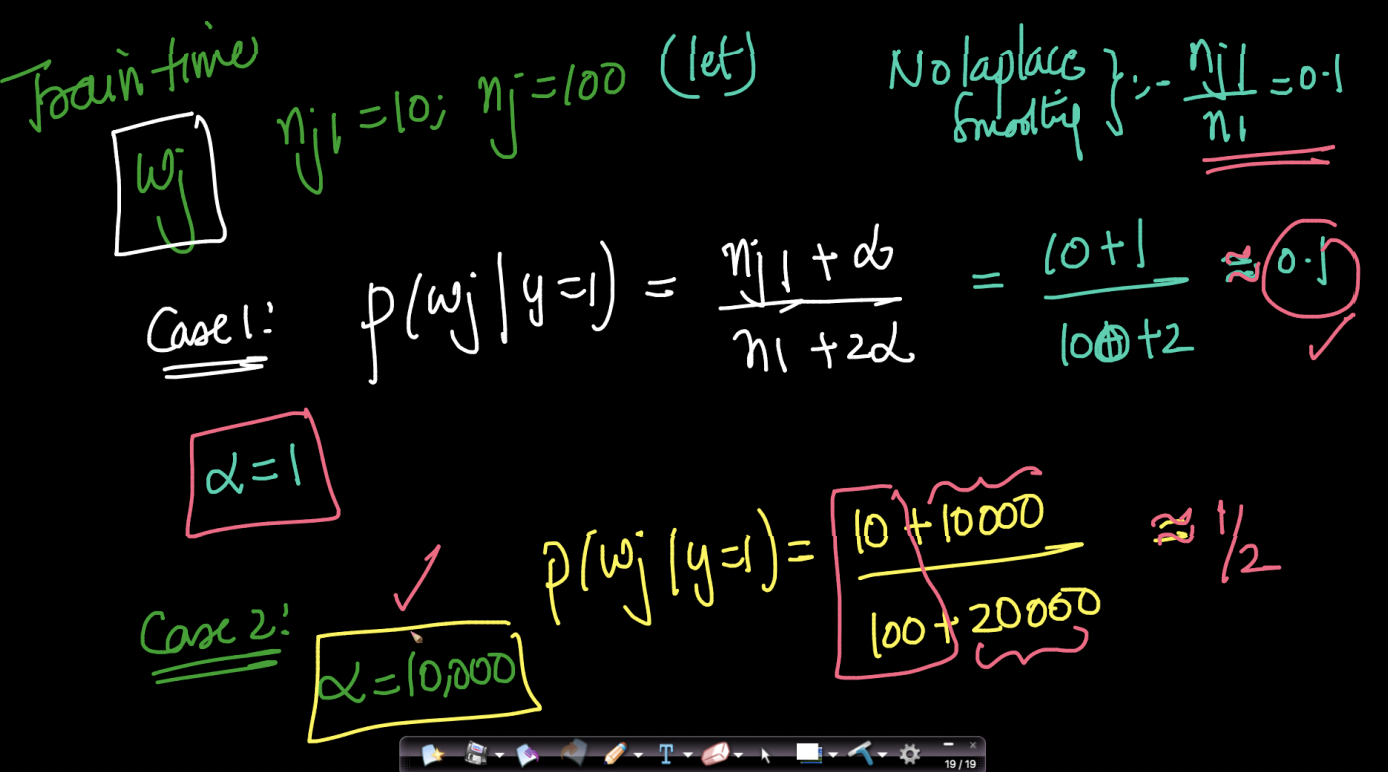


Lets assume that in our training dataset, the texts which have y=1 are more in number as compared to y=0 ,
- Say, $P(y=1)=0.7$ and $P(y=0)=0.3$

#### Q. What will happen to $P(y=1|w_1, w_2, ..., w_d)$ and $P(y=0|w_1, w_2, ..., w_d)$ ?

Since both depends only on the class priors, so on comparing $P(y=1|w_1, w_2, ..., w_d)$ and $P(y=0|w_1, w_2, ..., w_d)$,
 - $P(y=1|w_1, w_2, ..., w_d)\approx 0.7$
 - and $P(y=0|w_1, w_2, ..., w_d \approx 0.3$,


As a result, the Naive Bayes would just return **y = 1** (i.e. spam) for all texts.

<br>

To summarize, We can say that if  𝛼  value is too **large**, it begins **underfitting** the data.

**Note:** If we notice closely, this alpha is analogous the different values of K in KNN. Hence making the alpha as a hyperparameter



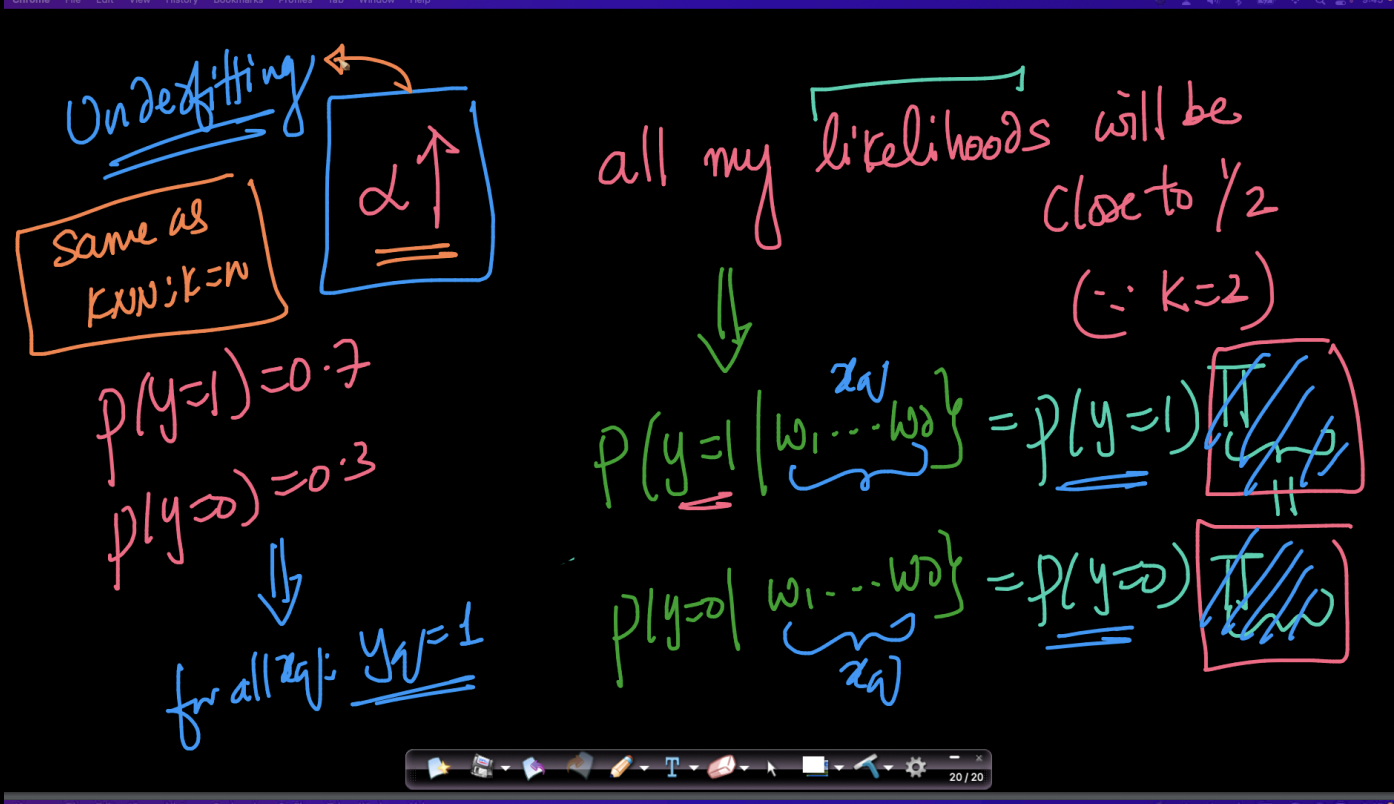

## **Q. What if we took a very large value of constant α  in test time ?**
To answer this question, let's take an example

Consider the situation that we are **testing** the $text_q$,  and the dataset has 100 samples where $y_i = 1 $ (i.e. $n_1 = 100$)

Now  suppose we come across a word $w'$ that has never occured in training dataset $(n'_1 = 0)$

Recall that when we took small value of $α$, say 1.

Then, $P(w'|y=1) = \frac{n'_1 + \alpha}{n_1 + 2\alpha} = \frac{0+1}{100+2} = \frac{1}{102}$ <br>

Since $P(w'|y=1)$ was a very small value, it did not break the mathematics behind naive Bayes model

<br>

#### Q. Now if we increased the value of α, such that α = 10000, Will it break the mathematics behind naive Bayes model ?

Since $n_1 = 100$ is very small in comparison to the value of α=10000 ($\alpha >> n_1$), it will make α **dominate** the probability,
- $P(w'|y=1) = \frac{n'_1 + \alpha}{n_1 + 2\alpha} = \frac{0+10000}{100+20000} \approx  \frac{1}{2}$ <br>

- Making $P(w'|y=1)$ **very close to 0.5**.


<br>

#### Recap:
Using all the study of training and test time, we can say

- During test time,
 - irrespective of the α value ,
 - we got rid of the multiplication by 0.

- But during our training time,
 -  As α increases, the likelihoods will become close to 0.5
 - Which will cause $P(y=0|w_1, w_2, ..., w_d)$ and $P(y=1 |w_1, w_2, ..., w_d)$ depend only on class priors. That might cause issue if number of samples of one class is more than the other.



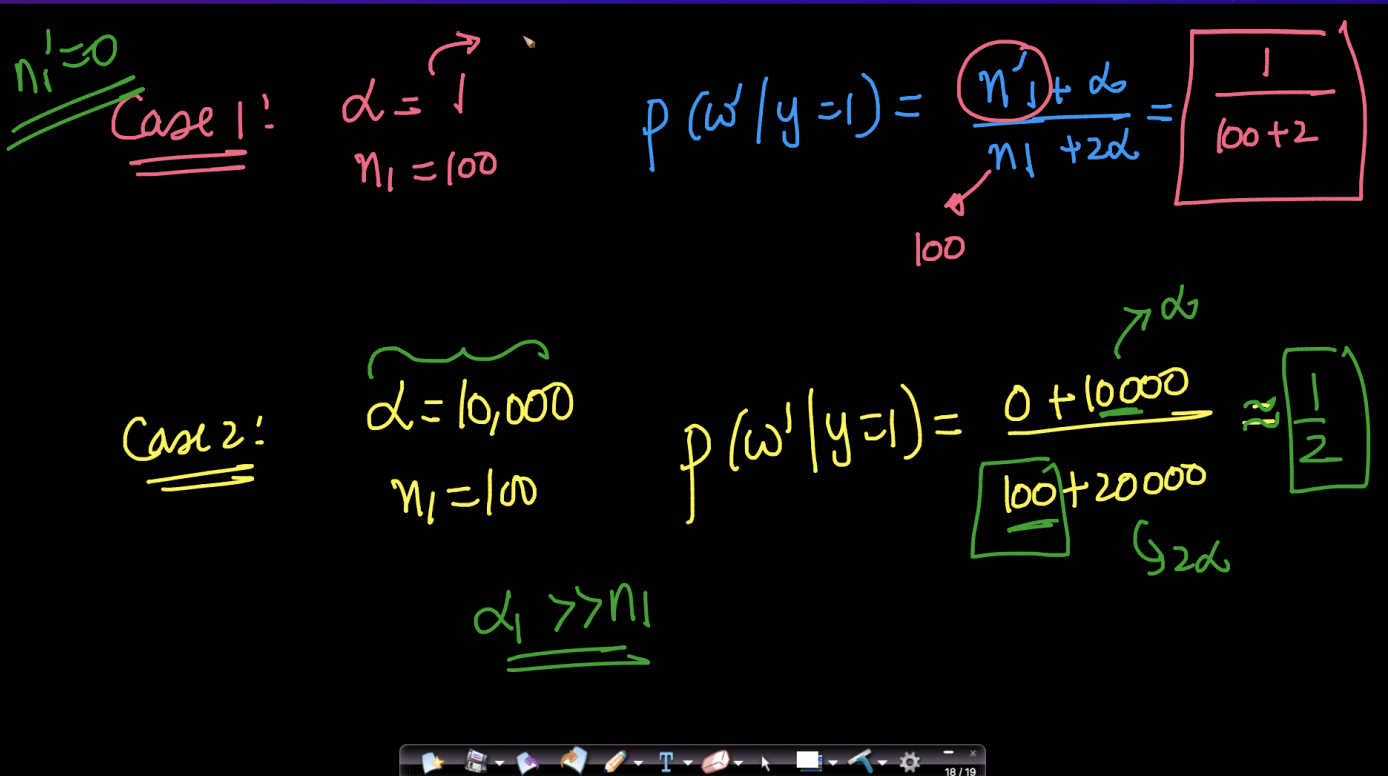

#### Q. What if we decrease the value of laplace smoothing constant α to much small values ?
This will cause the Naive Bayes model to **overfit** the data, because the likelihood with the added constants of Laplace smoothing become closer to the likelihood without  Laplace Smoothing.

Thus making,
 - $ P(w_j|y=1) = \frac{n_{j1}+α}{n_1+αC}≈ \frac{n_{j1}}{n_1}$
 - $ P(w_j|y=0) = \frac{n_{j0}+α}{n_0+αC}≈ \frac{n_{j0}}{n_0}$

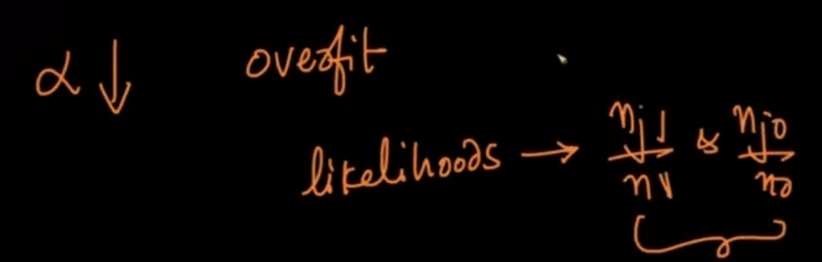

Hence, to summarize, we have a **hyper parameter (α)** using which we can **control the extent of overfitting or underfitting.**

- As **alpha increases**, we begin **underfitting** the data
- As **alpha decreases**, we begin **overfitting** the data



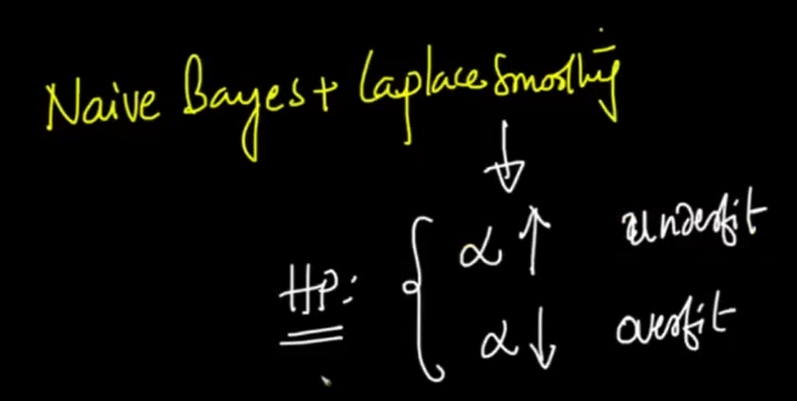


Recall, we talked about how by considering $P(𝑤'|𝑦=1) = 1$ and $P(𝑤'|𝑦=0) = 1 $ we were ignoring the effect of w' on the likelihood.

#### But can we see now , how by just considering $P(𝑤'|𝑦=1) = 1$ and $P(𝑤'|𝑦=0) = 1 $ it causes an issue ?

- This causes a lack of any hyperparameter value to be used for Naive Bayes
- which means we would not be able to control the bias-variance tradeoff.

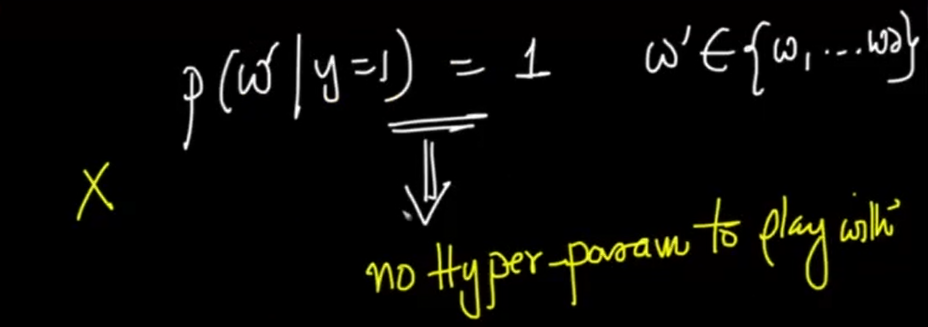

# Impact of imbalance

if we noticed closely, when we talked about $𝑃(𝑦=1)=0.7$ and $𝑃(𝑦=0)=0.3$ we are saying our data is imbalanced.


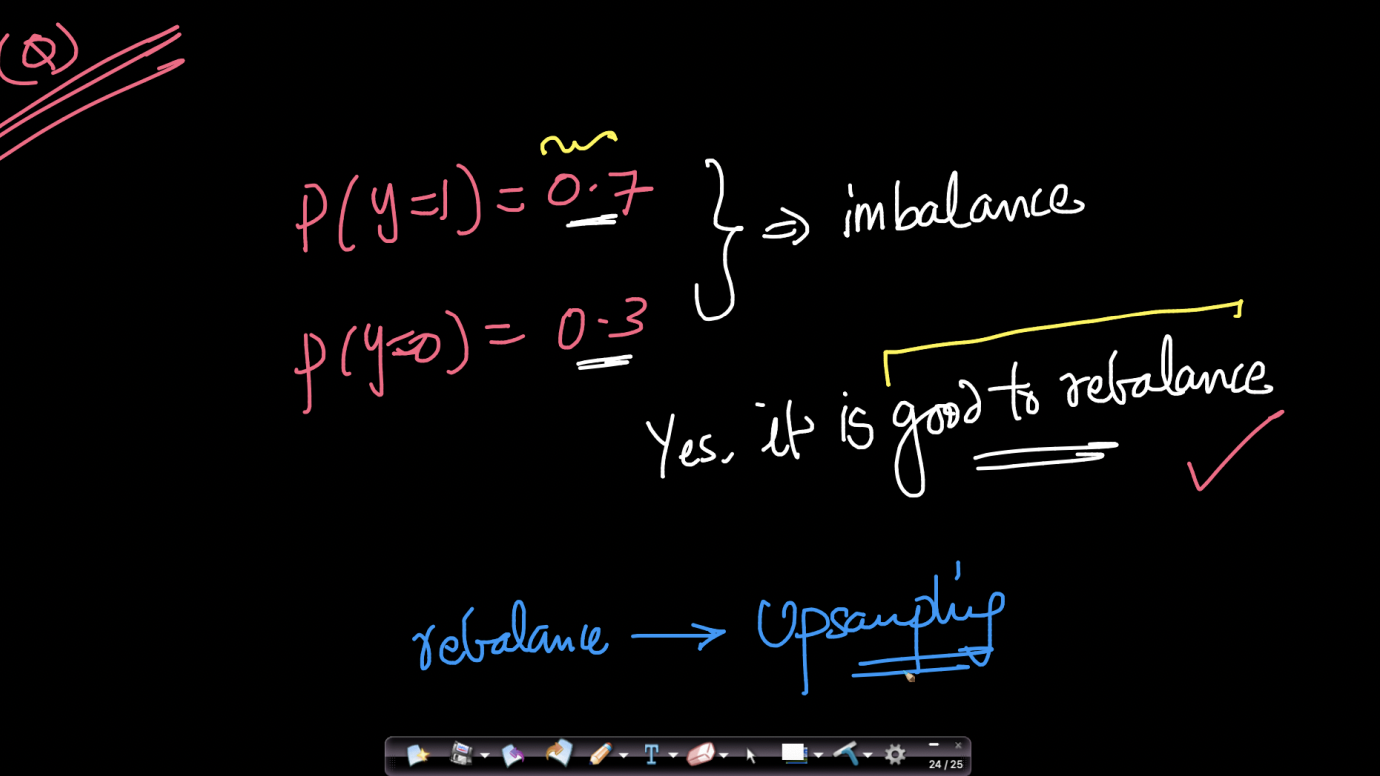

#### Q. Will imbalance in data impact Naive Bayes ?

Lets take an example

Assuming we have the following conditions:-
- $𝑃(𝑦=1)=0.7$,
- $𝑃(𝑦=0)=0.3$
- likelihood for y=1  $∏_{j=1}^{d} P(w_j|y=1)$ is 0.1
- likelihood for y=0  $∏_{j=1}^{d} P(w_j|y=0)$  is 0.2

Now when we compare Probability of Y=1 and Y =0 given a $text_i$ containing {$w_1,w_2...w_d$},  

 - Even though likelihood for y=1 is less, the class prior (P(y=1)=0.7) impacts the overall prediction.

 - $𝑃(𝑦=1|𝑡𝑒𝑥𝑡)=0.7∗0.1=0.07$ comes out to be greater than

 - $𝑃(𝑦=0|𝑡𝑒𝑥𝑡)=0.3∗0.2=0.06$

Thus the class prior for imbalance data is messing up with the prediction for Naive Bayes

Hence **sampling of data** is important.

<br>

#### Q. How does rebalancing of imbalance data help ?
If we notice the issue for 𝑃(𝑦=1|𝑡𝑒𝑥𝑡) > 𝑃(𝑦=0|𝑡𝑒𝑥𝑡) was because of P(y=1) > P(y=0).

Rebalancing makes the class prior values for both y=1 and y = 0 same

- P(y=1) = P(y=0) = 0.5

Now on comparing the P(y=1|text) and P(y=0|text), the Likelihood dominates for prediction by Niave Bayes


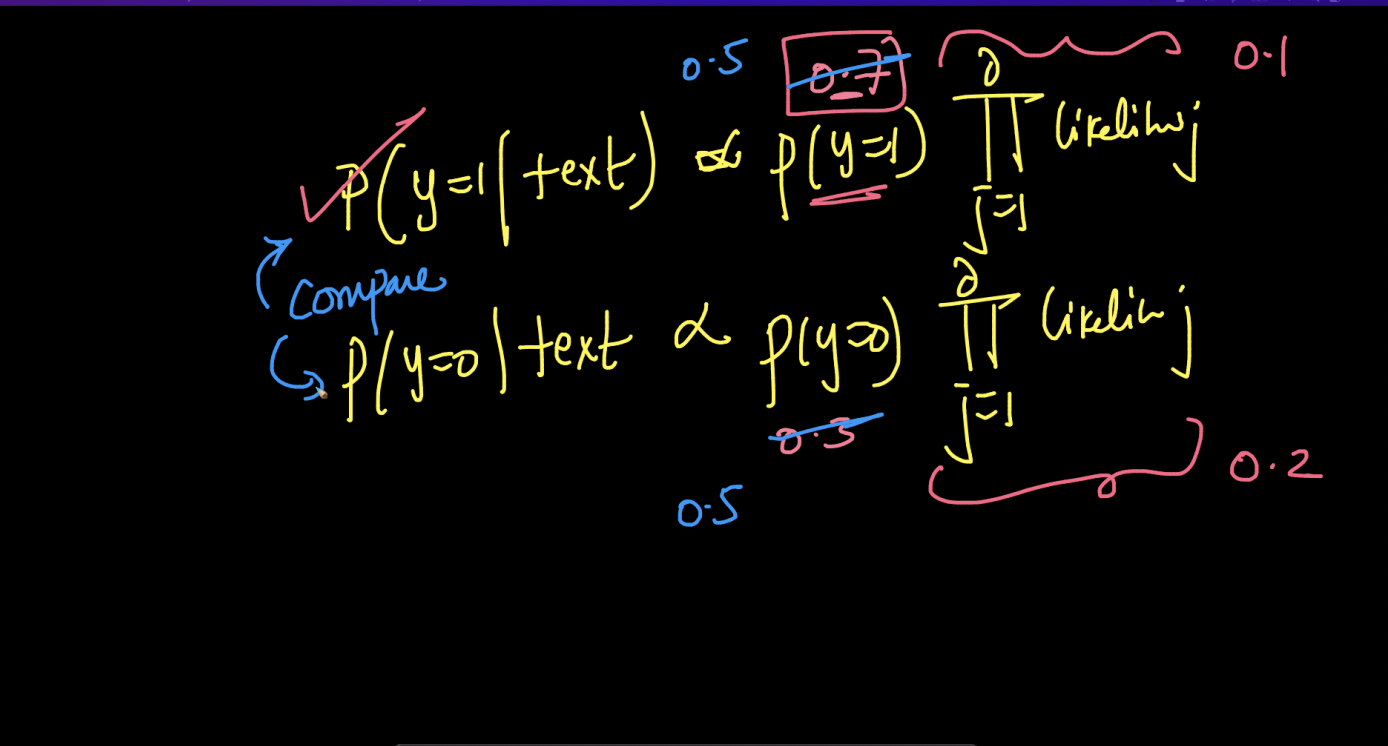

#### **Q. Will sampling the imbalanced data cause likelihoods to change?**
**No**. It does not effect the likelihoods.

<br>

Lets take an example to understand this

Supposedly, we have 1000 samples which had $y=1$ and 500 samples which had $y=0$ (i.e. $n_1=1000$ and $n_0=500$)

Now before rebalancing, if we find the likelihood for $w_j$ when y=0  
- Assuming the number of occurences of $w_j$ when $y=0$ be 50 (i.e. $n_{j0} = 50$).

Therefore the likelihood, which is defined as $P(w_j|y=0) = \frac{n_{j0}+α}{n_0+2α}$, becomes:
  - $P(w_j|y=0) = \frac{n_{j0}+α}{n_0+2α} = \frac{50+α}{500+2α}$
  - which is approx 10% when α small value

<br>

Now after rebalancing, we have just duplicated the samples of $y=0$ such that the number of samples of $y=0$ is now 1000.
 - Thus making $n_{j0}= 50 + 50 = 100$ and $n_0 = 500 + 500 = 1000$

Therefore now the likelihood becomes:
  - $P(w_j|y=0) = \frac{n_{j0}+α}{n_0+2α} = \frac{100+α}{1000+2α}$
  - which is still approx 10% when α small value


Hence the likelihood remians unchanged when balancing the imbalance data




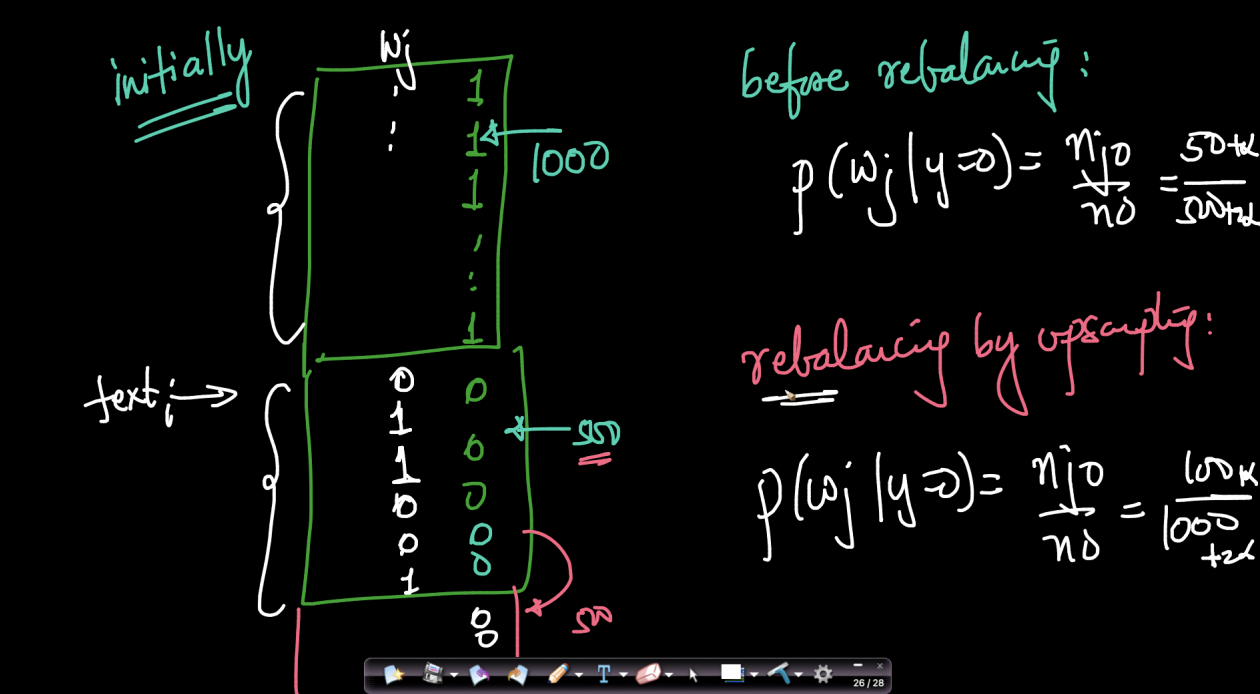

# **Underflow problem**


We have seen how Probability of y =1 given $text_i$ containing d unique words  {$w_1,w_2....w_d$} is propotional to the class prior P(y=1) and the likelihood $∏_{j=1}^{d} P(w_j|y=1)$.

Now these d+1 values, 1 being for the class prior value and d values being for the likelihood will have values between 0 and 1

## **Q. What computation problem can the multiplication of these d+1 values cause?**

When multiplying all of the d+1 values which have range 0 to 1, the resultant value can become a very small.

Lets understand this computational problem with an example

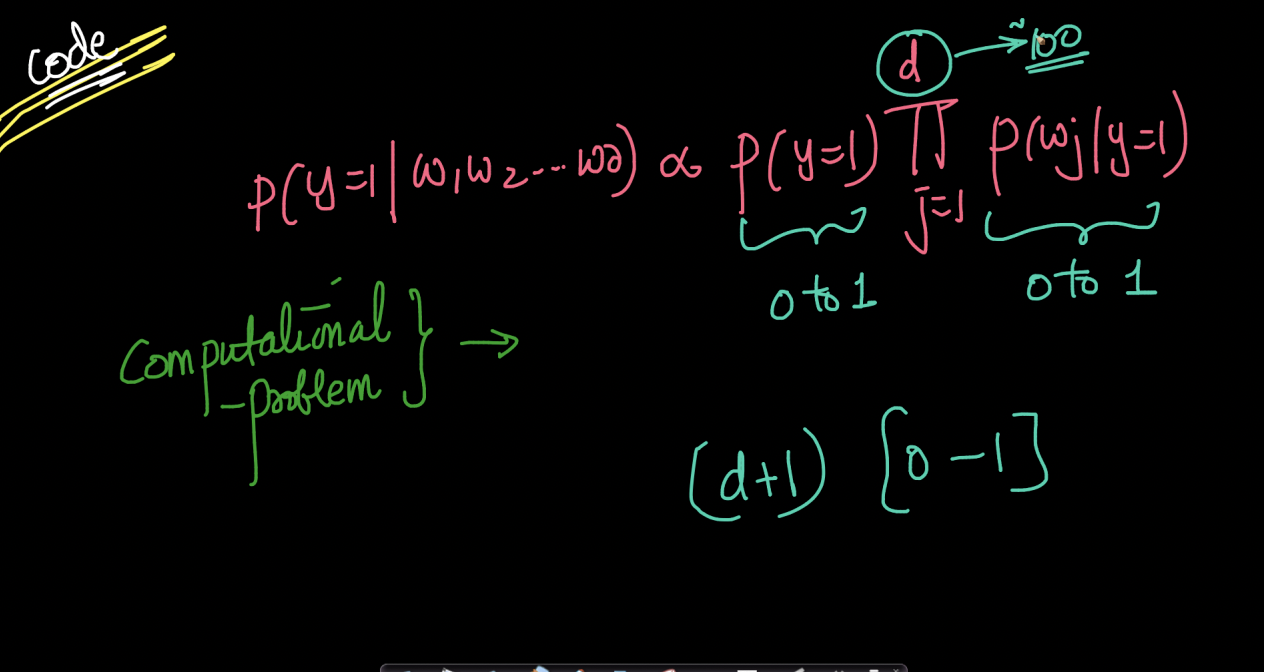

Suppose our text i is $w_1, w_2, w_3$

Let the class prior be  $P(y=1) = 0.1$ ,

And for finding the likelihood, suppose we have:  $P(w_1|y=1) = 0.01$, $P(w_2|y=1) = 0.02$, $P(w_3|y=1) = 0.3$  

Now on multiplying all the d+1 values, the resultant value becomes 0.000123

<br>

Thus as our d increases, the resultant value becomes smaller and smaller

And for our computer only store  a fix bit of value like Float64,

Thus causing the resultant value to no longer be stored in the memory

<br>

**NOTE:** Now this issue of the resultant value becoming too small is what is called Underflow Problem.



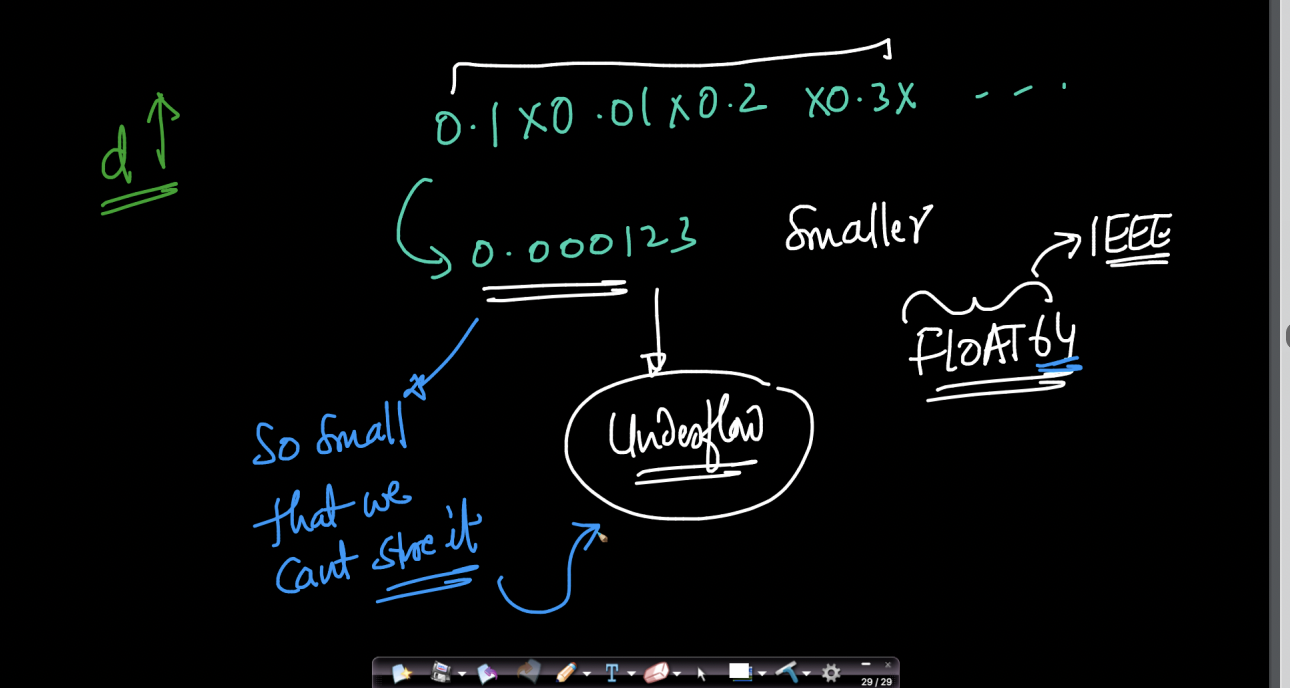

# **Q. Now how can we solve the underflow problem ?**


##### 1. What If we Reduced d ?
 - This wont be an ideal approach since we will be missing out on features/ words which might be useful
 - Leads to information loss

##### 2. What If we use Log ?
Lets see how Logarithm can work

Recall on how we defined the Probability of y=1 given words {$w_1,w_2,....w_d$}:
 - $p(y=1|w_1,w_2..2_d) = P(y=1) ∏_{j=1}^{d} P(w_j|y=1) $

Taking log on both sides
- $log ( p(y=1|w_1,w_2..2_d) ) = log [ P(y=1) ∏_{j=1}^{d} P(w_j|y=1)] $

- Since we know, log(ab) = log a + log b, which means products becomes summation in log

Hence Equation becomes:
 - $log ( p(y=1|w_1,w_2..2_d) ) = log [ P(y=1)] + ∑_{j=1}^{d} log[ P(w_j|y=1)] $


**Note:** addition is more computationally cheaper than multiplication.



#### Q. If we recall log can be negative, isn't that a problem?

**No**.

log is a monotonic funtion, meaning that as x increases , log(x) increases.


Thus if $P(y=1|w_1,w_2..w_d)$ > $P(y=0|w_1,w_2..w_d)$, then log of $P(y=1|w_1,w_2..w_d)$ will be greater than the log of $P(y=0|w_1,w_2..w_d)$ irrespective of the value being +ve or -ve.


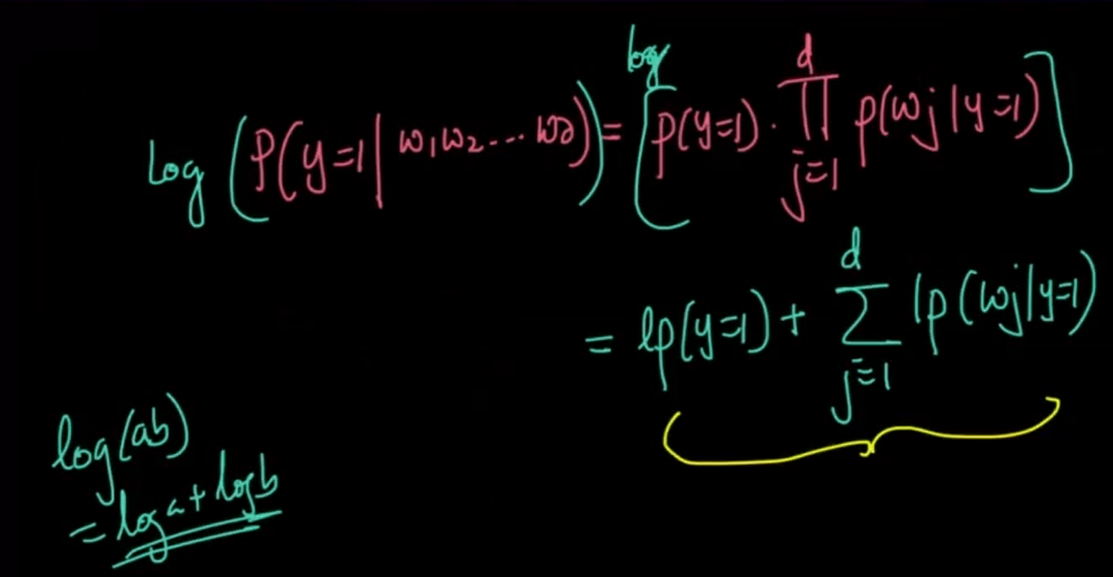

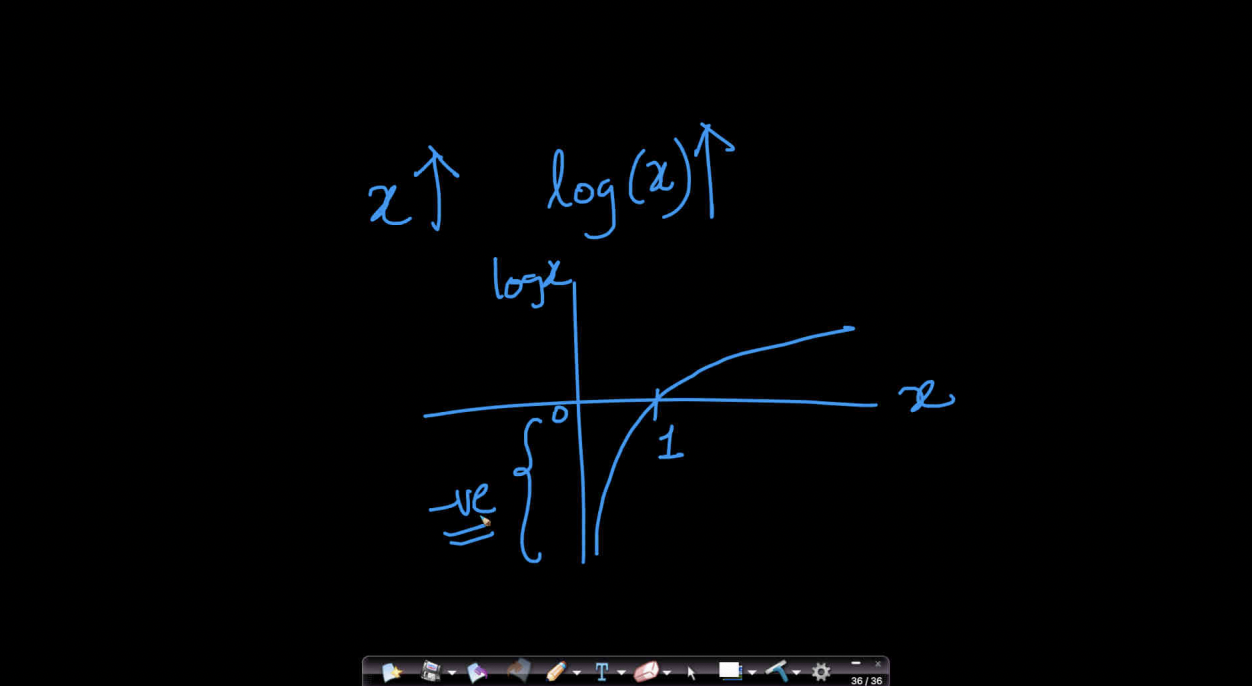

#### Q. Why Naive bayes is Naive ?

Most people say that the words are independent of each other in a text. i.e. $w_i$ and $w_j$ are independent of one another.

This is not true.

Example: If the words "Nigerian" and "Prince" exist together, then we know there is a higher chance the message is spam.

The Naivity of Naive Bayes is assuming that the words $w_i$ and $w_j$ are independent of each other only on the condition when y=1 or y=0.
 - $P(w_i,w_j|y=1) = P(w_i|y=1) * P(w_j|y=1) $


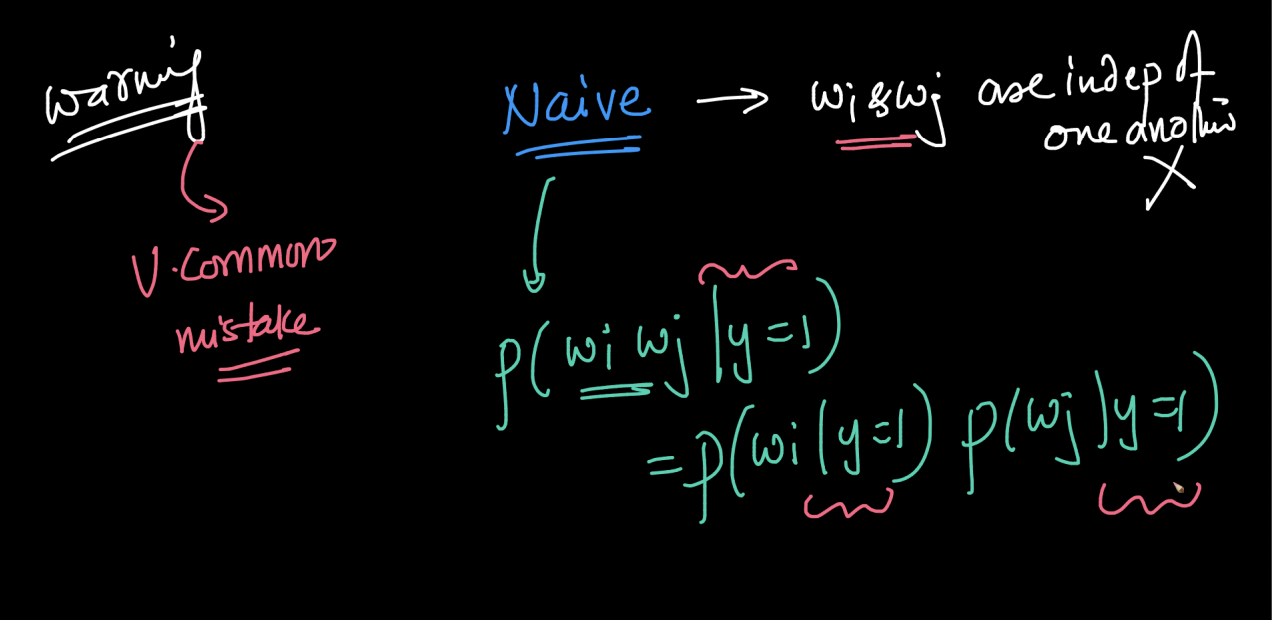

# **Feature Importance and Interpretability**

Now lets understand the feature importance and interpretability for the Naive Bayes Model

#### Q. What all do Naive Bayes Model have as weights ?

Class prior and Likelihoods

Now supposedly we have a query point $x_q$ and we classified as class 1 ($ŷ_q = 1$).

Since Class Prior remains same when comparing the $P(ŷ_q =1 | x_q ) $ and $P(ŷ_q =0 | x_q ) $  so we have to look into the likelihood part.


Now if We classified $x_q$ to class 1 , this means, We will only focus on the likelihood [$P(w_j|y=1)$] value for ŷ_q = 1


 We can then pick the **top likelihoods** of each word $(w_j)$ from all the d words,

<br>

#### Q. Why only focus on the top likelihood values of each word ?

Because these values are the ones that are actually impacting the likelihood the most.

Hence we can say from the top likelihoods, that these features or words are the most important among the remaining words to find the prediction.


therefore our likelihoods become the feature Importance and Interpretability for Naive Bayes


Lets take an example to understand this more

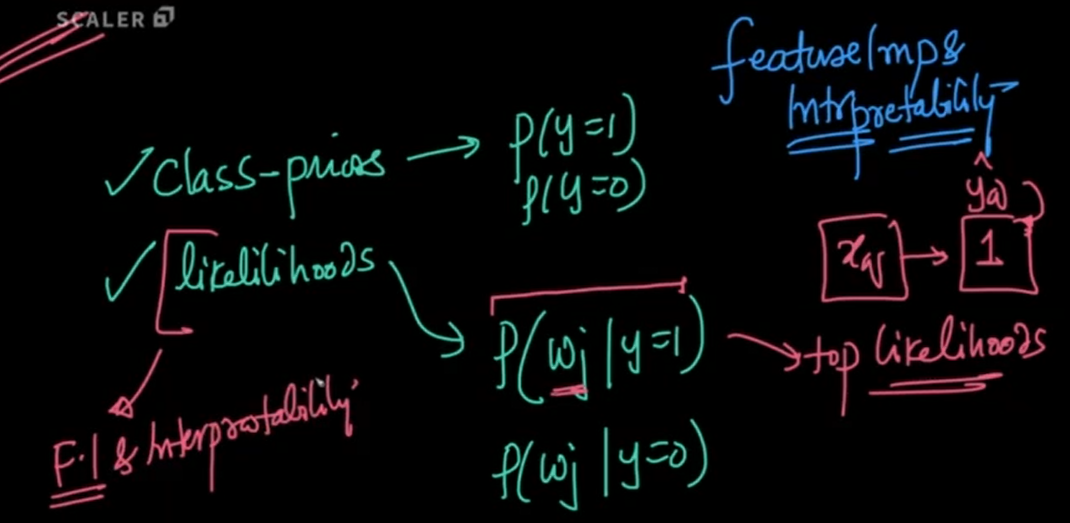

## **Suppose a query point ($x_q$) contains words {$w_1,w_3,w_6,w_7$} and we classifed it as class 1 ($ŷ_q =1$) such that the likelihood for each word is:**
 - $P(w_1|y=1) = 0.01$, $P(w_3|y=1) = 0.01$, $P(w_6|y=1) = 0.8$ , $P(w_7|y=1) = 0.2$

Then from the top likelihood,  we can say that the word $w_6$ and $w_7$ are the ones that effect the decision, with $w_6$ being the most important feature



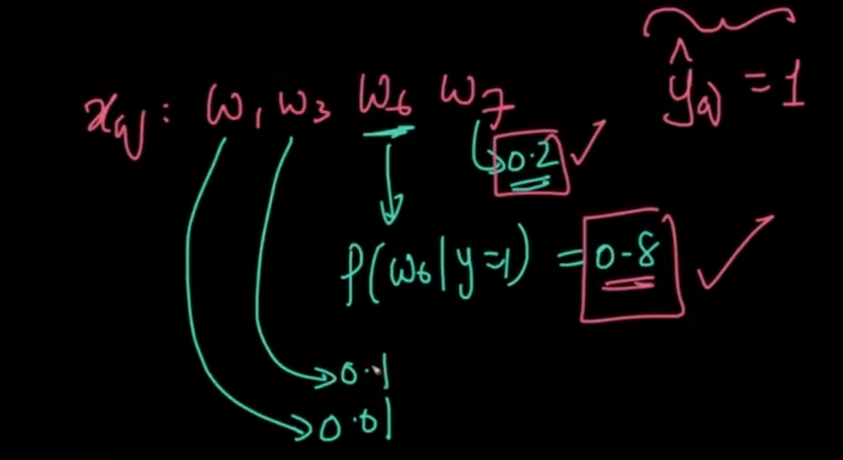

# **Impact of outliers**

Now lets talk about the outliers on Naive Bayes.

#### **Q. What can be outliers for Naive Bayes in test time ?**

Recall when we discussed about the new word (w') being in test data and not in training data, this word w' becomes our outlier

And we have already seen how **Laplace smoothing** takes care for such outlier.

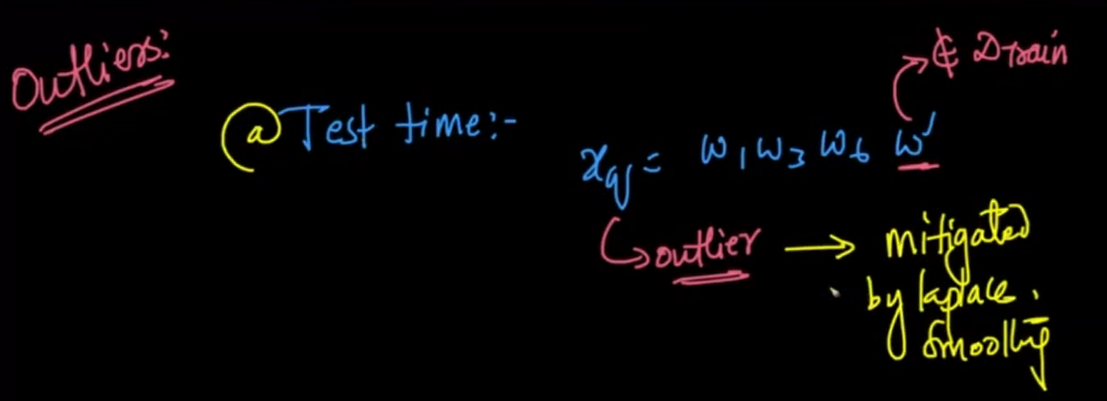

#### **Q. What can be outliers for Naive Bayes in train time ?**

Imagine we have a word $w_j$ which occurs only once, in 1000 samples of training data when y = 1

Thus the number of occurence of word $w_j$ when y =1 becomes: $n_{j1} = 1$

While the number of samples where y = 1 becomes: $n_1 = 1000$

So when computing the likelihood for the word $w_j$, we get:
  $P(w_j|y=1) = \frac{n_{j1}}{n_1} = \frac{1}{1000} $



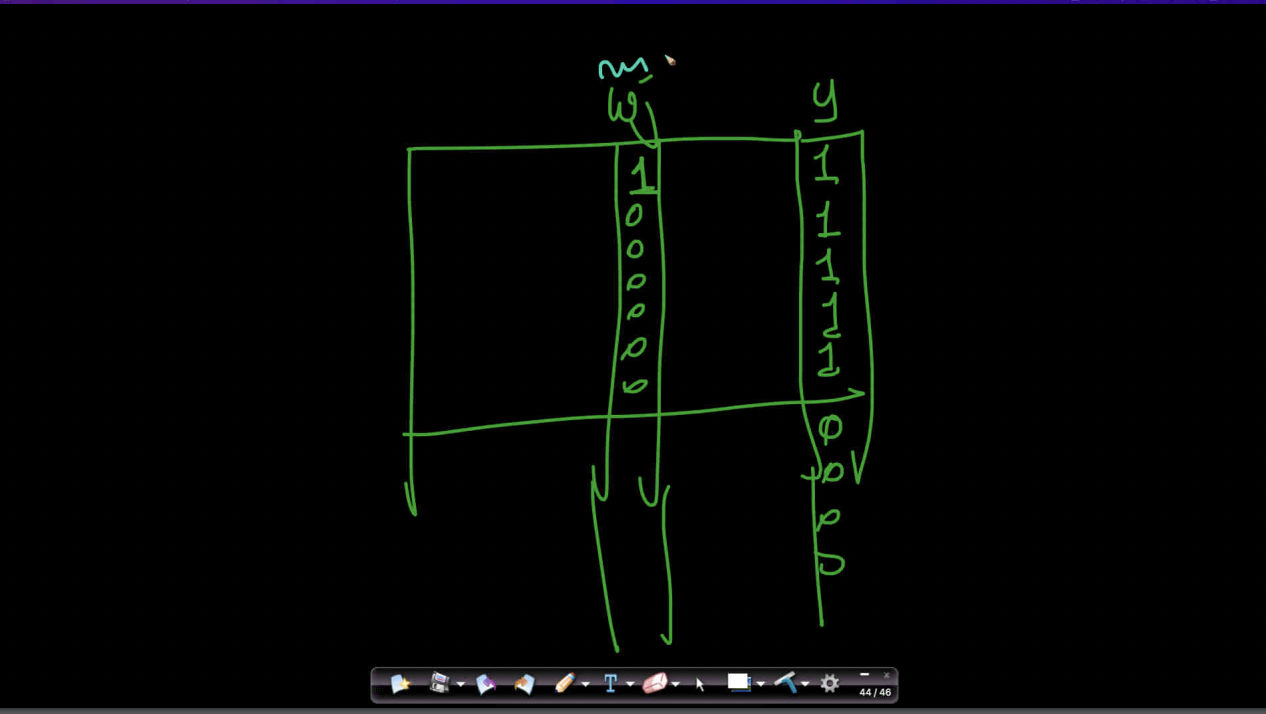


#### Q. Will we consider this word $w_j$ as outlier in training time?

This means that word $w_j$ can be a **rare word** or a **noise** in the training data.

Hence we can consider the word $w_j$ as outlier.

<br>

####** Q. How can we handle the outlier in training time ?**

Using Laplace smoothing with a slightly **larger α**.


**Note:** do not make α too large (like 10,000) as it can lead to underfitting

#### Question: Can we create different laplace smoothing constant (α) for each of the d words ?
- Theoritically we can create

- But if we had d = 10000 , then tuning of hyperparameters ($α_1,α_2,....α_10000$) becomes very hard

Hence practically we fix a single constant α for all the d words.


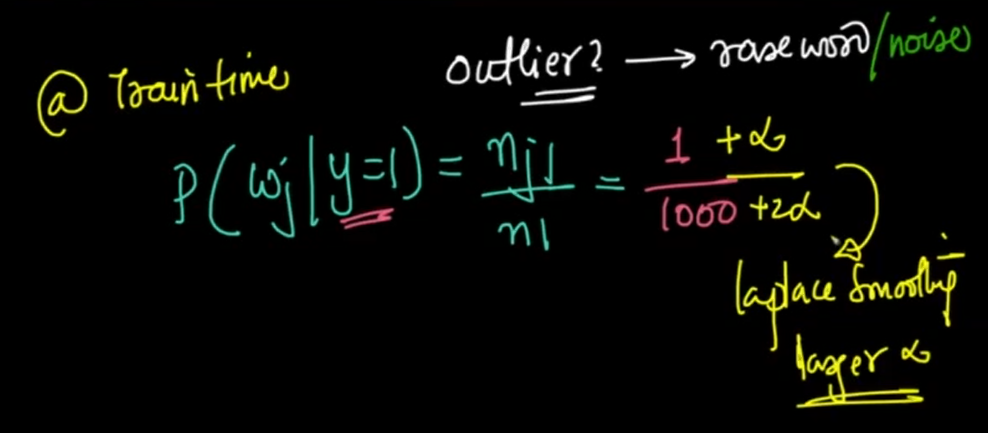

**We have another way to handle the outlier**

- if we check and see if the word $w_j$ occurs more than a **certain threshold**, (say 10),
- only then we consider the word $(w_j)$ in the likelihood calculation

Note: We should use the laplace smoothing approach than this hack,
- Since if we just increase our $\alpha$, we will. behandling the  outlier  

Because, if a word occurs less than the threshold, then instead of making $n_{j1} = 0$,
- just increasing the α, and we will deal with the outliers for both training and testing time.


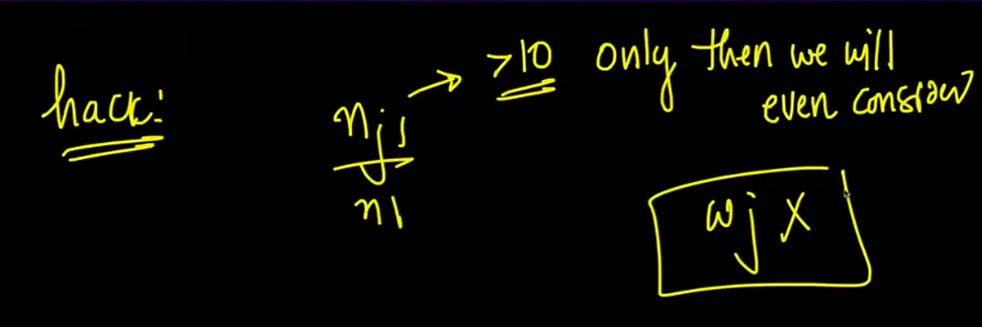

## **Multinomial Naive Bayes**

If we see Bernouli Naive bayes have features or words of the text as 0 or 1
- where value of 1 for a word $w_j$ meaning that the word exists in the text

<br>

#### But now if we need to find how many times the $w_j$ occurs in the text_i. How can we store this information ?
This is where we use another version of Naive Bayes which is Multinomial Naive Bayes

Now instead of storing whether the word $w_j$ exists in $text_i$, we store the number of times the word $w_j$ occurs

<br>

#### Lets say $w_j$ occurs 3 times, then how will we compute the likelihood for the word $w_j$ ?
Likelihood will be the number of times the word $w_j$ has occured 3 times in all the samples of the data when y=1
 - $P(w_j=3|y=1)$

This means if w_j has values {1,2,3,4,5...k} for the entire sample of the dataset,
- we have to compute the likelihood of the word $w_j$ for each of these k-1 values
- while in Bernouli, the likelihood of the word $w_j$ will be only for the 2 values (w_j = 0 or w_j = 1)


Hence making Multinominal Naive Bayes slightly **computational costly** than Bernouli Naive bayes

<br>

#### Q. Why use Multinomial Naive Bayes if its computationally expensive ?
 It stores more information about the word in each of the texts present in the dataset.


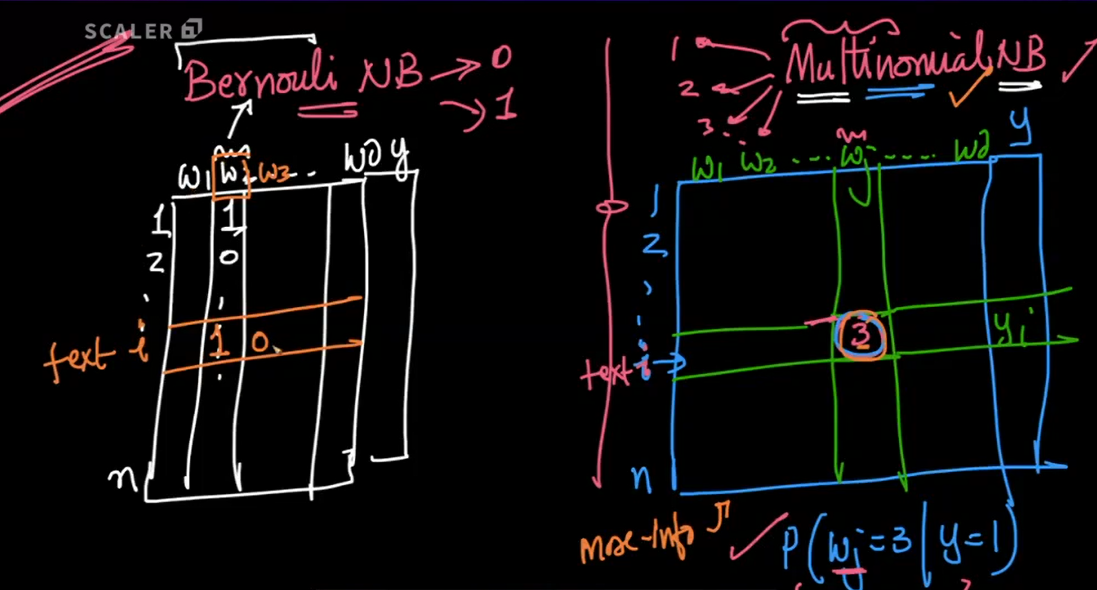

Lets generalize on what all we need when finding $P(y=1|w_1,....w_d)$ and $P(y=0|w_1,....w_d)$ for Naive Bayes models:


1. Class priors for $y=1$ and $y=0$ which our defined as:
 - $P(y=1)$ and $P(y=0)$

2. Likelihoods of each of the d word, which is the propability of the word $w_j$ occuring C times in the text when $y=1$ or $y=0$. Defined as:

  - $P(w_j=C |y=1)$ and  $P(w_j=C |y=0)$

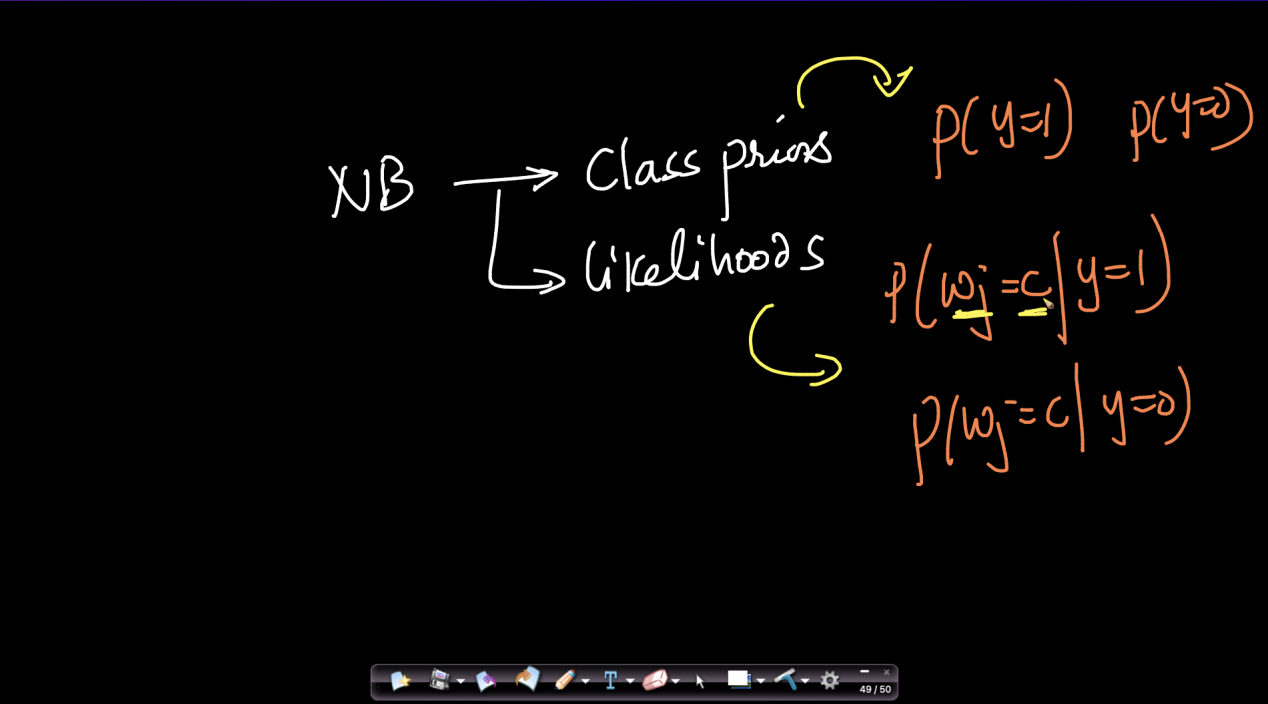

# Code

Lets implement Naive Bayes on our Spam and Ham dataset

Now to find the count of each word in the text,  we use  [CountVectorizer()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
- that vectorizes the words with the counts of occurences of words in a given text i.

<br>

#### Q. Will this matrix be dense or sparse?
Across all the text messages, there may be thousands of words i.e. thousands of features. But any given text would only have a handful of words.

So, naturally, the value for only some of these features would be non-zero.

As a result, we get a **sparse matrix** indicating the counts of the few words that do exist out of the thousands of words.

<br>

#### Q. Should we train the CountVectorizer() on the entire dataset?
No, only train the CountVectorizer() on training data and use the parameters value to convert the test data

<br>

#### Q. Do we need to standardize data for Naive Bayes?
**No.**

Since Naive Bayes is **not a distane based algorithm**, but rather an **information based algorithm**.

Hence scaling does not help to converge it faster.

In [ ]:
from sklearn import feature_extraction, naive_bayes, metrics

#Count Vectorizer
f = feature_extraction.text.CountVectorizer()

X_train = f.fit_transform(df_X_train)
X_test = f.transform(df_X_test)

print(X_train.shape,X_test.shape)


(4179, 7615) (1393, 7615)


Taking different values of Laplace Smoothing constant

In [ ]:
params = {
        'alpha':[0.01, 0.1, 1, 10]
        }

We plug in the following values into our `GridSearchCV()` function to get the results:-
- Multinomial NB classifier,
- dictionary containing the range of values we wish to try for our hyperparameter,
- scoring metric
- number of folds for the cross validation set


Since data is Imbalanced, we use F-1 score as evaluation metrics

In [ ]:
# Multinomial NB

from sklearn.model_selection import GridSearchCV

mnb = naive_bayes.MultinomialNB()
clf = GridSearchCV(mnb, params, scoring = "f1", cv=3)

clf.fit(X_train, y_train)

res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")



Parameters:{'alpha': 0.01} Mean_score: 0.8937240112174837 Rank: 2
Parameters:{'alpha': 0.1} Mean_score: 0.8896934746467164 Rank: 3
Parameters:{'alpha': 1} Mean_score: 0.9022297472053865 Rank: 1
Parameters:{'alpha': 10} Mean_score: 0.8603433402346446 Rank: 4


As you can see, we get the best performance when $α=1$, with F1- score of 0.9,

Now implementing this Naive Bayes on test Data

In [ ]:

mnb = naive_bayes.MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

print(metrics.f1_score(y_test,y_pred))


0.9214092140921409


We see how Multinomial Naive Bayes achieved f-1 score of 0.92 even when data is imbalanced.
- showing how Mulitnomial Naive Bayes is not much effected by the class priors